# Data Science Capstone - Predicting Car Accident Severity
**Sergio Aguirre**
***

## **Introduction - Business Problem**

Daily we are faced with making decisions that, however simple they may seem, can change our lives. One of these decisions is which route to take to reach a specific destination.
Generally, the optimization and decision go through which route is shorter, will take less time or is less congested, but what about security?.

The goal of this work is to analyze data in order to provide a model that will predict the severity of an accident, given a number of features that will be extracted from the car collision data from Seattle. The model will classify and predict severity, so a driver can use this model through a third-party or government app to change course or drive more carefully, given that he is not wanting to get involved into an accident.

This project will use Machine Learning to build models to predict the severity of the car accidents according to the external factors in the car collision data of the city of Seattle. This model can be applied to multiple practical conditions, such as route planning, signals placement or road improvements. This model can be methodologically extrapolated to other cities anywhere in the world that have similar data collection systems.

This project is aimed at government agencies and private companies that want to optimize their route planning and prevent accidents.

## Data

The car collision data that will be used comes from the Seattle Department of Transportation, which records the information related to traffic accidents and the associated factors. This dataset includes a severity indicator (SEVERITYCODE) for each traffic accident where the values are 1 for minors and 2 for severe accidents. 
It also includes external information associated with accidents that is of direct utility for the study, such as weather, road and lighting conditions. Obviously crucial information about the date and time of occurrence, as well as internal factors such as the influence of alcohol (UNDERINFL), speeding (SPEEDING) or inattention that allow us to rule out certain accidents from our data that do not have to do purely with external factors. For a complete description of each parameter, consult the metadata included in the repository.

The data looks like the following:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the data

df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

C:\Users\Sergio\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Droping columns that not add value to the target of the projetc

df_dp = df.drop(['OBJECTID','INCKEY','INTKEY','STATUS','EXCEPTRSNCODE','EXCEPTRSNDESC',\
                 'REPORTNO','COLDETKEY','SDOTCOLNUM','SDOT_COLDESC', 'SEVERITYDESC', \
                 'SEVERITYCODE.1','ST_COLDESC','CROSSWALKKEY','SEGLANEKEY','PERSONCOUNT',\
                 'PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','JUNCTIONTYPE','SDOT_COLCODE','PEDROWNOTGRNT',\
                 'ST_COLCODE','HITPARKEDCAR','INCDATE','LOCATION'], axis='columns')

In [4]:
df_dp.head()

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,Intersection,Angles,3/27/2013 2:54:00 PM,NaN,N,Overcast,Wet,Daylight,NaN
1,1,-122.347294,47.647172,Block,Sideswipe,12/20/2006 6:55:00 PM,NaN,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,-122.334540,47.607871,Block,Parked Car,11/18/2004 10:20:00 AM,NaN,0,Overcast,Dry,Daylight,NaN
3,1,-122.334803,47.604803,Block,Other,3/29/2013 9:26:00 AM,NaN,N,Clear,Dry,Daylight,NaN
4,2,-122.306426,47.545739,Intersection,Angles,1/28/2004 8:04:00 AM,NaN,0,Raining,Wet,Daylight,NaN


In [5]:
# Checking for the unique info inside each column
i=0
for n in df_dp.columns:
    print(df_dp.columns[i],' ',df_dp[n].unique())
    i=i+1

SEVERITYCODE   [2 1]
X   [-122.3231484 -122.3472943 -122.33454   ... -122.3927543 -122.3042172
 -122.3616722]
Y   [47.70314032 47.64717249 47.60787143 ... 47.51527348 47.6695375
 47.55672231]
ADDRTYPE   ['Intersection' 'Block' 'Alley' nan]
COLLISIONTYPE   ['Angles' 'Sideswipe' 'Parked Car' 'Other' 'Cycles' 'Rear Ended' 'Head On'
 nan 'Left Turn' 'Pedestrian' 'Right Turn']
INCDTTM   ['3/27/2013 2:54:00 PM' '12/20/2006 6:55:00 PM' '11/18/2004 10:20:00 AM'
 ... '1/19/2019 9:25:00 AM' '1/15/2019 4:48:00 PM' '11/30/2018 3:45:00 PM']
INATTENTIONIND   [nan 'Y']
UNDERINFL   ['N' '0' nan '1' 'Y']
WEATHER   ['Overcast' 'Raining' 'Clear' nan 'Unknown' 'Other' 'Snowing'
 'Fog/Smog/Smoke' 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt'
 'Severe Crosswind' 'Partly Cloudy']
ROADCOND   ['Wet' 'Dry' nan 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']
LIGHTCOND   ['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights' nan
 'Unknown' 'Dusk' 'Dawn' 'Dark - Street Light

In [6]:
# Checking NaN values inside the data
df_dp.isna().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
ADDRTYPE            1926
COLLISIONTYPE       4904
INCDTTM                0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
SPEEDING          185340
dtype: int64

In [7]:
# View Y/N data codificaton for columns associate a driver
print(df_dp['INATTENTIONIND'].unique())
print(df_dp['SPEEDING'].unique())
print(df_dp['UNDERINFL'].unique())

[nan 'Y']
[nan 'Y']
['N' '0' nan '1' 'Y']


In [8]:
# Recodificating data Y/N to 1/0 and replacing NaN with 0 in columns with only Yes
df_dp['SPEEDING'].fillna(0, inplace=True)
df_dp['SPEEDING'].replace('Y',1, inplace=True)
df_dp['UNDERINFL'].fillna(0, inplace=True)
df_dp['UNDERINFL'].replace(['Y','1'],1, inplace=True)
df_dp['UNDERINFL'].replace(['N','0'],0, inplace=True)
df_dp['INATTENTIONIND'].fillna(0, inplace=True)
df_dp['INATTENTIONIND'].replace(['Y','1'],1, inplace=True)
print(df_dp['INATTENTIONIND'].unique())
print(df_dp['SPEEDING'].unique())
print(df_dp['UNDERINFL'].unique())

[0 1]
[0 1]
[0 1]


In [9]:
# Check Dataframe Lenght and NaN Count
print('Dataframe Length',len(df_dp))
print('\n NAN COUNT\n',df_dp.isna().sum())

Dataframe Length 194673

 NAN COUNT
 SEVERITYCODE         0
X                 5334
Y                 5334
ADDRTYPE          1926
COLLISIONTYPE     4904
INCDTTM              0
INATTENTIONIND       0
UNDERINFL            0
WEATHER           5081
ROADCOND          5012
LIGHTCOND         5170
SPEEDING             0
dtype: int64


In [10]:
# Droping every NaN and view new size

df_dp.dropna(inplace=True)
print('Dataframe Length',len(df_dp))
print('\n NAN COUNT\n',df_dp.isna().sum())

Dataframe Length 184146

 NAN COUNT
 SEVERITYCODE      0
X                 0
Y                 0
ADDRTYPE          0
COLLISIONTYPE     0
INCDTTM           0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
SPEEDING          0
dtype: int64


In [11]:
# Extracting Time, Month, Weekday, Hour

df_dp['DTIME'] = pd.to_datetime(df_dp['INCDTTM'])
df_dp['MONTH']= df_dp['DTIME'].dt.month
df_dp['WEEK']= df_dp['DTIME'].dt.week
df_dp['WEEKDAY'] = df_dp['DTIME'].dt.weekday
df_dp['HOUR'] = df_dp['DTIME'].dt.hour

In [12]:
df_dp.head(3)

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,DTIME,MONTH,WEEK,WEEKDAY,HOUR
0,2,-122.323148,47.703140,Intersection,Angles,3/27/2013 2:54:00 PM,0,0,Overcast,Wet,Daylight,0,2013-03-27 14:54:00,3,13,2,14
1,1,-122.347294,47.647172,Block,Sideswipe,12/20/2006 6:55:00 PM,0,0,Raining,Wet,Dark - Street Lights On,0,2006-12-20 18:55:00,12,51,2,18
2,1,-122.334540,47.607871,Block,Parked Car,11/18/2004 10:20:00 AM,0,0,Overcast,Dry,Daylight,0,2004-11-18 10:20:00,11,47,3,10


In [13]:
# Detecting problem with Hour
df_dp['DTIME'].head(10)

0   2013-03-27 14:54:00
1   2006-12-20 18:55:00
2   2004-11-18 10:20:00
3   2013-03-29 09:26:00
4   2004-01-28 08:04:00
5   2019-04-20 17:42:00
6   2008-12-09 00:00:00
7   2020-04-15 17:47:00
8   2006-06-15 13:00:00
9   2006-03-20 15:49:00
Name: DTIME, dtype: datetime64[ns]

In [14]:
# Identifying rows with wrong times
df_dp['TIME']=df_dp['DTIME'].dt.time
mask = df_dp['TIME']==df_dp['TIME'][6]
df_dp['TIME'][mask]= np.nan
print('\n NAN COUNT\n',df_dp.isna().sum())


 NAN COUNT
 SEVERITYCODE          0
X                     0
Y                     0
ADDRTYPE              0
COLLISIONTYPE         0
INCDTTM               0
INATTENTIONIND        0
UNDERINFL             0
WEATHER               0
ROADCOND              0
LIGHTCOND             0
SPEEDING              0
DTIME                 0
MONTH                 0
WEEK                  0
WEEKDAY               0
HOUR                  0
TIME              24875
dtype: int64


<ipython-input-14-ef603ea997b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dp['TIME'][mask]= np.nan


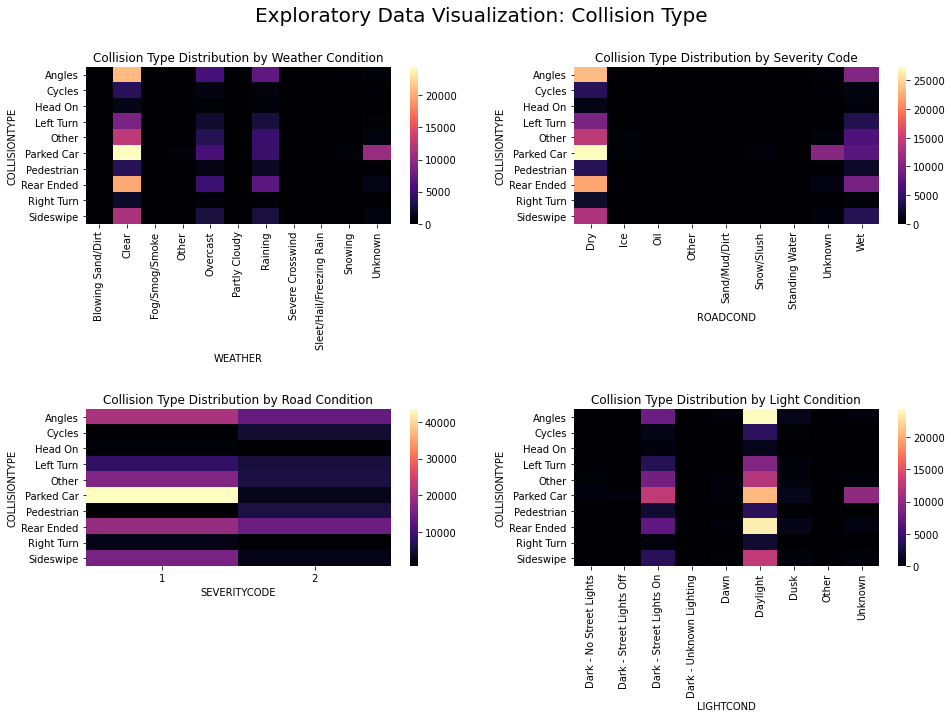

In [20]:
# Exploring the data with some plots:

fig, axs = plt.subplots(2,2,figsize=(14,10))
width=0.35

fig.suptitle("Exploratory Data Visualization: Collision Type",fontsize=20,y=1.02)

# WEATHER CONDITION
aux = df_dp.pivot_table(index='COLLISIONTYPE',columns='WEATHER',values='SEVERITYCODE',aggfunc='count',fill_value=0)
g1 = sns.heatmap(aux,cmap='magma',ax=axs[0,0])
axs[0,0].set_title('Collision Type Distribution by Weather Condition')

aux = df_dp.pivot_table(index='COLLISIONTYPE',columns='SEVERITYCODE',values='WEATHER',aggfunc='count',fill_value=0)
g1 = sns.heatmap(aux,cmap='magma',ax=axs[1,0])
axs[0,1].set_title('Collision Type Distribution by Severity Code')

aux = df_dp.pivot_table(index='COLLISIONTYPE',columns='ROADCOND',values='SEVERITYCODE',aggfunc='count',fill_value=0)
g1 = sns.heatmap(aux,cmap='magma',ax=axs[0,1])
axs[1,0].set_title('Collision Type Distribution by Road Condition')


aux = df_dp.pivot_table(index='COLLISIONTYPE',columns='LIGHTCOND',values='SEVERITYCODE',aggfunc='count',fill_value=0)
g1 = sns.heatmap(aux,cmap='magma',ax=axs[1,1])
axs[1,1].set_title('Collision Type Distribution by Light Condition')

#handles, labels = axs[0,0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.85, 1.02))

fig.tight_layout(pad=3)
fig.savefig('exploratory_01_CT.png',bbox_inches='tight')
plt.show()

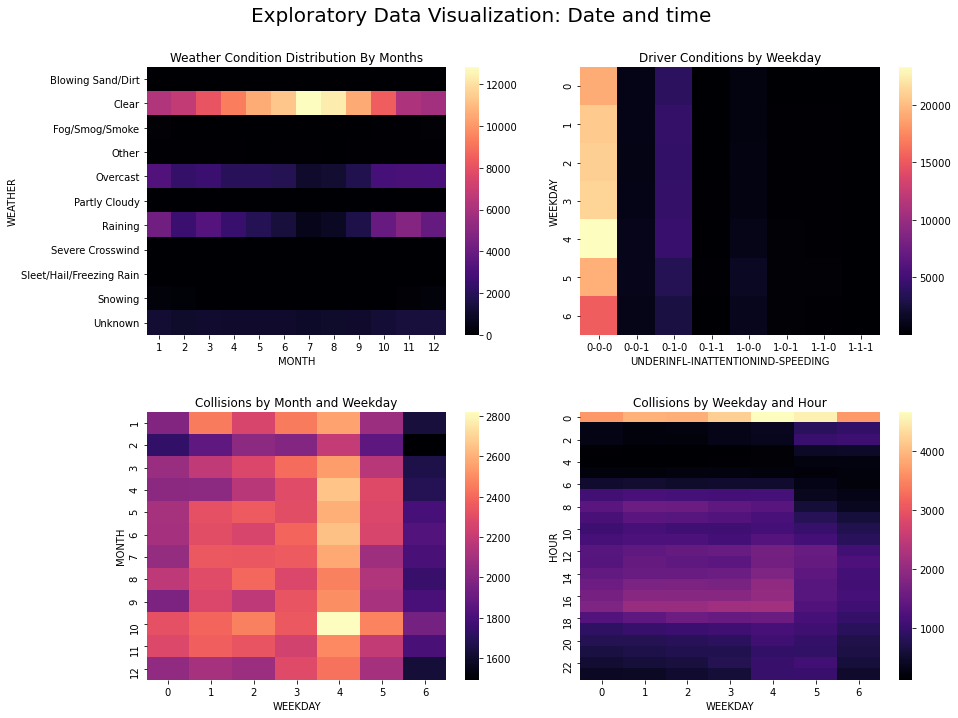

In [27]:
fig, axs = plt.subplots(2,2,figsize=(14,10))
width=0.35

fig.suptitle("Exploratory Data Visualization: Date and time",fontsize=20,y=1.02)

# WEATHER CONDITION BY MONTHS
aux = df_dp.pivot_table(index='WEATHER',columns='MONTH',values='SEVERITYCODE',aggfunc='count',fill_value=0)
g1 = sns.heatmap(aux,cmap='magma',ax=axs[0,0])
axs[0,0].set_title('Weather Condition Distribution By Months')

# Driver Condition by Weekday
aux = df_dp.pivot_table(index='WEEKDAY',columns=['UNDERINFL','INATTENTIONIND','SPEEDING'],values='SEVERITYCODE',aggfunc='count',fill_value=0)
g1 = sns.heatmap(aux,cmap='magma',ax=axs[0,1])
axs[0,1].set_title('Driver Conditions by Weekday')

aux = df_dp.pivot_table(index='MONTH',columns='WEEKDAY',values='SEVERITYCODE',aggfunc='count',fill_value=0)
g1 = sns.heatmap(aux,cmap='magma',ax=axs[1,0])
axs[1,0].set_title('Collisions by Month and Weekday')


aux = df_dp.pivot_table(index='HOUR',columns='WEEKDAY',values='SEVERITYCODE',aggfunc='count',fill_value=0)
g1 = sns.heatmap(aux,cmap='magma',ax=axs[1,1])
axs[1,1].set_title('Collisions by Weekday and Hour')

fig.tight_layout(pad=3)
fig.savefig('exploratory_02_DaT.png',bbox_inches='tight')
plt.show()

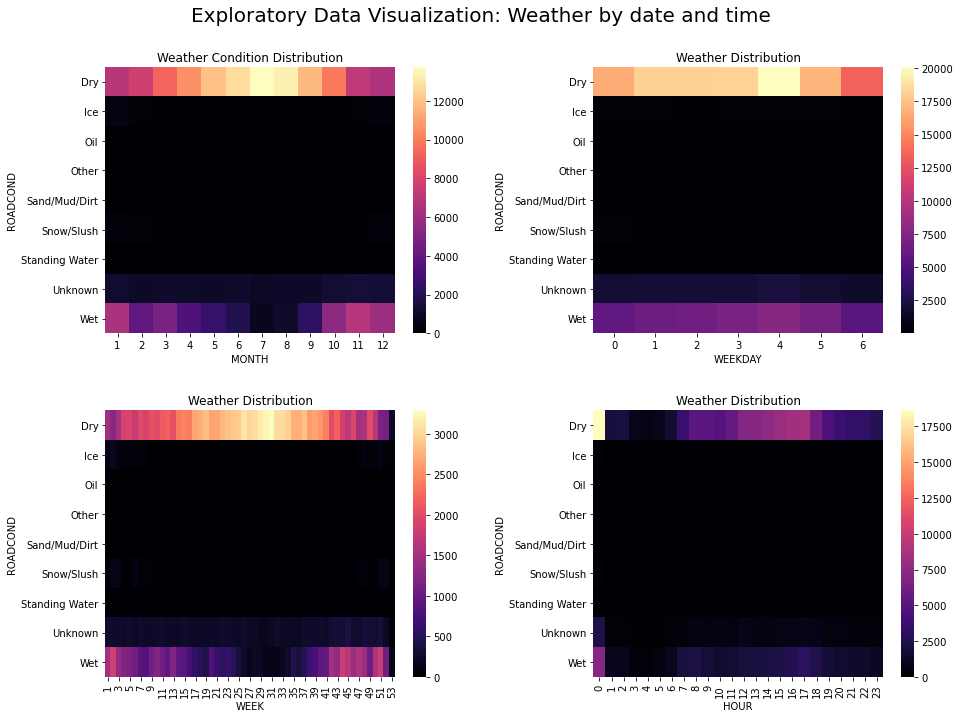

In [54]:
fig, axs = plt.subplots(2,2,figsize=(14,10))
width=0.35

fig.suptitle("Exploratory Data Visualization: Weather by date and time",fontsize=20,y=1.02)

# WEATHER CONDITION
aux = df_dp.pivot_table(index='ROADCOND',columns='MONTH',values='SEVERITYCODE',aggfunc='count',fill_value=0)
g1 = sns.heatmap(aux,cmap='magma',ax=axs[0,0])
axs[0,0].set_title('Weather Condition Distribution')

aux = df_dp.pivot_table(index='ROADCOND',columns='WEEKDAY',values='SEVERITYCODE',aggfunc='count',fill_value=0)
g1 = sns.heatmap(aux,cmap='magma',ax=axs[0,1])
axs[0,1].set_title('Weather Distribution')

aux = df_dp.pivot_table(index='ROADCOND',columns='WEEK',values='SEVERITYCODE',aggfunc='count',fill_value=0)
g1 = sns.heatmap(aux,cmap='magma',ax=axs[1,0])
axs[1,0].set_title('Weather Distribution')


aux = df_dp.pivot_table(index='ROADCOND',columns='HOUR',values='SEVERITYCODE',aggfunc='count',fill_value=0)
g1 = sns.heatmap(aux,cmap='magma',ax=axs[1,1])
axs[1,1].set_title('Weather Distribution')

fig.tight_layout(pad=3)
#fig.savefig('External_Condition.png')
plt.show()

In [28]:
# Droping rows with no time data
df_dp2=df_dp.dropna()
df_dp2.drop(['TIME'],axis='columns',inplace=True)
print('Dataframe Length',len(df_dp2))
print('\n NAN COUNT\n',df_dp2.isna().sum())

Dataframe Length 159271

 NAN COUNT
 SEVERITYCODE      0
X                 0
Y                 0
ADDRTYPE          0
COLLISIONTYPE     0
INCDTTM           0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
SPEEDING          0
DTIME             0
MONTH             0
WEEK              0
WEEKDAY           0
HOUR              0
dtype: int64


C:\Users\Sergio\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [62]:
# Using only external data from the accidents
# Droping data for Alcohol influence and speeding.

df_dp3 = df_dp2.drop(['INATTENTIONIND','DTIME','INCDTTM','COLLISIONTYPE'],axis='columns')
mask = (df_dp3['UNDERINFL']==1) | (df_dp3['SPEEDING']==1)
df_dp3['UNDERINFL'][mask]= np.nan
df_dp3.dropna(inplace=True)
df_dp3.drop(['UNDERINFL','SPEEDING'],axis='columns',inplace=True)
print('Dataframe Length',len(df_dp3))

Dataframe Length 145222


<ipython-input-62-de5fcf415f88>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dp3['UNDERINFL'][mask]= np.nan


In [63]:
df_dp3.head()

,SEVERITYCODE,X,Y,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND,MONTH,WEEK,WEEKDAY,HOUR
0,2,-122.323148,47.703140,Intersection,Overcast,Wet,Daylight,3,13,2,14
1,1,-122.347294,47.647172,Block,Raining,Wet,Dark - Street Lights On,12,51,2,18
2,1,-122.334540,47.607871,Block,Overcast,Dry,Daylight,11,47,3,10
3,1,-122.334803,47.604803,Block,Clear,Dry,Daylight,3,13,4,9
4,2,-122.306426,47.545739,Intersection,Raining,Wet,Daylight,1,5,2,8


In [64]:
print( df_dp3['WEATHER'].value_counts(),'\n' )
print( df_dp3['ROADCOND'].value_counts(),'\n' )
print( df_dp3['LIGHTCOND'].value_counts(),'\n' )
print( df_dp3['SEVERITYCODE'].value_counts() )

Clear                       86795
Raining                     23958
Overcast                    21038
Unknown                     11678
Other                         601
Snowing                       582
Fog/Smog/Smoke                432
Sleet/Hail/Freezing Rain       72
Blowing Sand/Dirt              40
Severe Crosswind               21
Partly Cloudy                   5
Name: WEATHER, dtype: int64 

Dry               97326
Wet               34600
Unknown           11702
Ice                 733
Snow/Slush          652
Other                78
Standing Water       50
Oil                  41
Sand/Mud/Dirt        40
Name: ROADCOND, dtype: int64 

Daylight                    93416
Dark - Street Lights On     32989
Unknown                     10433
Dusk                         4471
Dawn                         1881
Dark - No Street Lights      1058
Dark - Street Lights Off      814
Other                         150
Dark - Unknown Lighting        10
Name: LIGHTCOND, dtype: int64 

1    101752

In [65]:
# Weather conditions less frequent
df_dp3['WEATHER'].replace('Unknown',value=np.nan, inplace=True)
df_dp3['WEATHER'].replace('Sleet/Hail/Freezing Rain',value='Raining', inplace=True)
df_dp3['WEATHER'].replace('Blowing Sand/Dirt',value='Other', inplace=True)
df_dp3['WEATHER'].replace('Severe Crosswind',value='Other', inplace=True)
df_dp3['WEATHER'].replace('Partly Cloudy',value='Overcast', inplace=True)

# Road conditions less frequent
df_dp3['ROADCOND'].replace(to_replace='Unknown',value=np.nan, inplace=True)
df_dp3['ROADCOND'].replace(to_replace='Ice',value='Ice/Snow', inplace=True)
df_dp3['ROADCOND'].replace(to_replace='Snow/Slush',value='Ice/Snow', inplace=True)
df_dp3['ROADCOND'].replace(to_replace='Standing Water',value='Wet', inplace=True)
df_dp3['ROADCOND'].replace(to_replace='Sand/Mud/Dirt',value='Other', inplace=True)
df_dp3['ROADCOND'].replace(to_replace='Oil',value='Other', inplace=True)

# Light conditions less frequent
df_dp3['LIGHTCOND'].replace(to_replace='Unknown',value=np.nan, inplace=True)
df_dp3['LIGHTCOND'].replace(to_replace='Dark - Street Lights On',value='Dark', inplace=True)
df_dp3['LIGHTCOND'].replace(to_replace='Dark - No Street Lights',value='Dark', inplace=True)
df_dp3['LIGHTCOND'].replace(to_replace='Dark - Street Lights Off',value='Dark', inplace=True)
df_dp3['LIGHTCOND'].replace(to_replace='Dark - Unknown Lighting',value='Dark', inplace=True)

print( df_dp3['WEATHER'].value_counts(),'\n' )
print( df_dp3['ROADCOND'].value_counts(),'\n' )
print( df_dp3['LIGHTCOND'].value_counts(),'\n' )
print('\n NAN COUNT\n',df_dp3.isna().sum(), '\n') 
print('Length Dataframe ',len(df_dp3) )

Clear             86795
Raining           24030
Overcast          21043
Other               662
Snowing             582
Fog/Smog/Smoke      432
Name: WEATHER, dtype: int64 

Dry         97326
Wet         34650
Ice/Snow     1385
Other         159
Name: ROADCOND, dtype: int64 

Daylight    93416
Dark        34871
Dusk         4471
Dawn         1881
Other         150
Name: LIGHTCOND, dtype: int64 


 NAN COUNT
 SEVERITYCODE        0
X                   0
Y                   0
ADDRTYPE            0
WEATHER         11678
ROADCOND        11702
LIGHTCOND       10433
MONTH               0
WEEK                0
WEEKDAY             0
HOUR                0
dtype: int64 

Length Dataframe  145222


In [66]:
df_ext= df_dp3.dropna()
print('Dataframe Length',len(df_ext))

Dataframe Length 130635


In [67]:
df_ext.head()

,SEVERITYCODE,X,Y,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND,MONTH,WEEK,WEEKDAY,HOUR
0,2,-122.323148,47.703140,Intersection,Overcast,Wet,Daylight,3,13,2,14
1,1,-122.347294,47.647172,Block,Raining,Wet,Dark,12,51,2,18
2,1,-122.334540,47.607871,Block,Overcast,Dry,Daylight,11,47,3,10
3,1,-122.334803,47.604803,Block,Clear,Dry,Daylight,3,13,4,9
4,2,-122.306426,47.545739,Intersection,Raining,Wet,Daylight,1,5,2,8


In [68]:
df_ext.describe(include='all')

,SEVERITYCODE,X,Y,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND,MONTH,WEEK,WEEKDAY,HOUR
count,130635.000000,130635.000000,130635.000000,130635,130635,130635,130635,130635.000000,130635.000000,130635.000000,130635.000000
unique,NaN,NaN,NaN,2,6,4,5,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Block,Clear,Dry,Daylight,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,80481,85243,95409,90893,NaN,NaN,NaN,NaN
mean,1.325931,-122.330001,47.619147,NaN,NaN,NaN,NaN,6.528748,26.798209,2.889187,13.365339
std,0.468723,0.029560,0.056343,NaN,NaN,NaN,NaN,3.390964,14.789777,1.907421,5.267877
min,1.000000,-122.419032,47.495573,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000
25%,1.000000,-122.347568,47.575533,NaN,NaN,NaN,NaN,4.000000,14.000000,1.000000,10.000000
50%,1.000000,-122.329907,47.614682,NaN,NaN,NaN,NaN,7.000000,27.000000,3.000000,14.000000
75%,2.000000,-122.311909,47.663663,NaN,NaN,NaN,NaN,9.000000,39.000000,4.000000,17.000000


In [69]:
#########################
## EXTERNAL CONDITIONS ##
#########################

# Weather on Severity
weather=df_ext[['WEATHER','SEVERITYCODE']]
w1=weather[weather['SEVERITYCODE']==1]['WEATHER'].value_counts()
w2=weather[weather['SEVERITYCODE']==2]['WEATHER'].value_counts()
del weather
weather = pd.DataFrame({'1':w1})
weather['2']= w2.to_frame()
weather['TOT']= weather['1']+ weather['2']
del w1,w2

# Road Condition on Severity
road=df_ext[['ROADCOND','SEVERITYCODE']]
w1=road[road['SEVERITYCODE']==1]['ROADCOND'].value_counts()
w2=road[road['SEVERITYCODE']==2]['ROADCOND'].value_counts()
del road
road = pd.DataFrame({'1':w1})
road['2']= w2.to_frame()
road['TOT']= road['1']+ road['2']
del w1,w2

# Light Condition on Severity
light=df_ext[['LIGHTCOND','SEVERITYCODE']]
w1=light[light['SEVERITYCODE']==1]['LIGHTCOND'].value_counts()
w2=light[light['SEVERITYCODE']==2]['LIGHTCOND'].value_counts()
del light
light = pd.DataFrame({'1':w1})
light['2']= w2.to_frame()
light['TOT']= light['1']+ light['2']
del w1,w2

#################
## Date & Time ##
#################

# Month on Severity
month=df_ext[['MONTH','SEVERITYCODE']]
w1=month[month['SEVERITYCODE']==1]['MONTH'].value_counts()
w2=month[month['SEVERITYCODE']==2]['MONTH'].value_counts()
del month
month = pd.DataFrame({'1':w1})
month['2']= w2.to_frame()
month['TOT']= month['1']+ month['2']
del w1,w2

# Week of Year on Severity
week=df_ext[['WEEK','SEVERITYCODE']]
w1=week[week['SEVERITYCODE']==1]['WEEK'].value_counts()
w2=week[week['SEVERITYCODE']==2]['WEEK'].value_counts()
del week
week = pd.DataFrame({'1':w1})
week['2']= w2.to_frame()
week['TOT']= week['1']+ week['2']
del w1,w2

# Weekday on Severity
weekday=df_ext[['WEEKDAY','SEVERITYCODE']]
w1=weekday[weekday['SEVERITYCODE']==1]['WEEKDAY'].value_counts()
w2=weekday[weekday['SEVERITYCODE']==2]['WEEKDAY'].value_counts()
del weekday
weekday = pd.DataFrame({'1':w1})
weekday['2']= w2.to_frame()
weekday['TOT']= weekday['1']+ weekday['2']
del w1,w2

# Hour on Severity
hour=df_ext[['HOUR','SEVERITYCODE']]
w1=hour[hour['SEVERITYCODE']==1]['HOUR'].value_counts()
w2=hour[hour['SEVERITYCODE']==2]['HOUR'].value_counts()
del hour
hour = pd.DataFrame({'1':w1})
hour['2']= w2.to_frame()
hour['TOT']= hour['1']+ hour['2']
del w1,w2

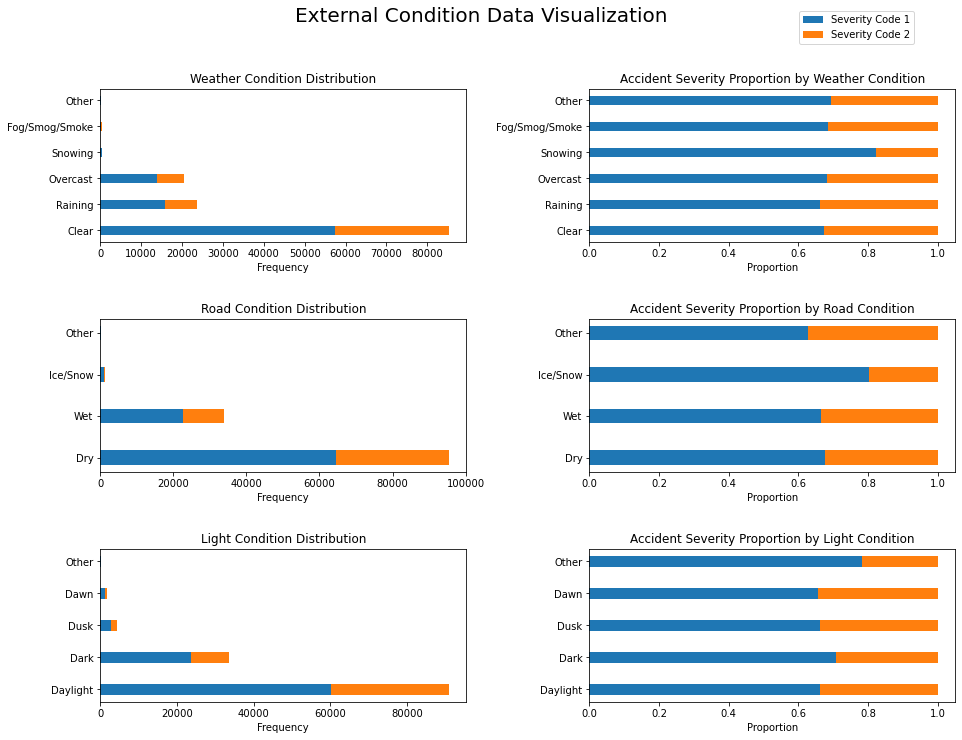

In [70]:
fig, axs = plt.subplots(3,2,figsize=(14,10))
width=0.35

fig.suptitle("External Condition Data Visualization",fontsize=20,y=1.05)

# WEATHER CONDITION
axs[0,0].barh(weather.index,weather['1'],width,label='Severity Code 1')
axs[0,0].barh(weather.index,weather['2'],width,left=weather['1'],label='Severity Code 2')
axs[0,0].set(xlabel='Frequency', ylabel='')
axs[0,0].set_title('Weather Condition Distribution')

axs[0,1].barh(weather.index,weather['1']/weather['TOT'],width,label='Severity Code 1')
axs[0,1].barh(weather.index,weather['2']/weather['TOT'],width,left=weather['1']/weather['TOT'],label='Severity Code 2')
axs[0,1].set(xlabel='Proportion', ylabel='')
axs[0,1].set_title('Accident Severity Proportion by Weather Condition')

# ROAD CONDITION
axs[1,0].barh(road.index,road['1'],width,label='Severity Code 1')
axs[1,0].barh(road.index,road['2'],width,left=road['1'],label='Severity Code 2',)
axs[1,0].set(xlabel='Frequency', ylabel='')
axs[1,0].set_title('Road Condition Distribution')

axs[1,1].barh(road.index,road['1']/road['TOT'],width,label='Severity Code 1')
axs[1,1].barh(road.index,road['2']/road['TOT'],width,left=road['1']/road['TOT'],label='Severity Code 2')
axs[1,1].set(xlabel='Proportion', ylabel='')
axs[1,1].set_title('Accident Severity Proportion by Road Condition')

# LIGHT CONDITION
axs[2,0].barh(light.index,light['1'],width,label='Severity Code 1')
axs[2,0].barh(light.index,light['2'],width,left=light['1'],label='Severity Code 2')
axs[2,0].set(xlabel='Frequency', ylabel='')
axs[2,0].set_title('Light Condition Distribution')

axs[2,1].barh(light.index,light['1']/light['TOT'],width,label='Severity Code 1')
axs[2,1].barh(light.index,light['2']/light['TOT'],width,left=light['1']/light['TOT'],label='Severity Code 2')
axs[2,1].set(xlabel='Proportion', ylabel='')
axs[2,1].set_title('Accident Severity Proportion by Light Condition')

handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.85, 1.02))

fig.tight_layout(pad=3)
fig.savefig('External_Condition.png')
plt.show()

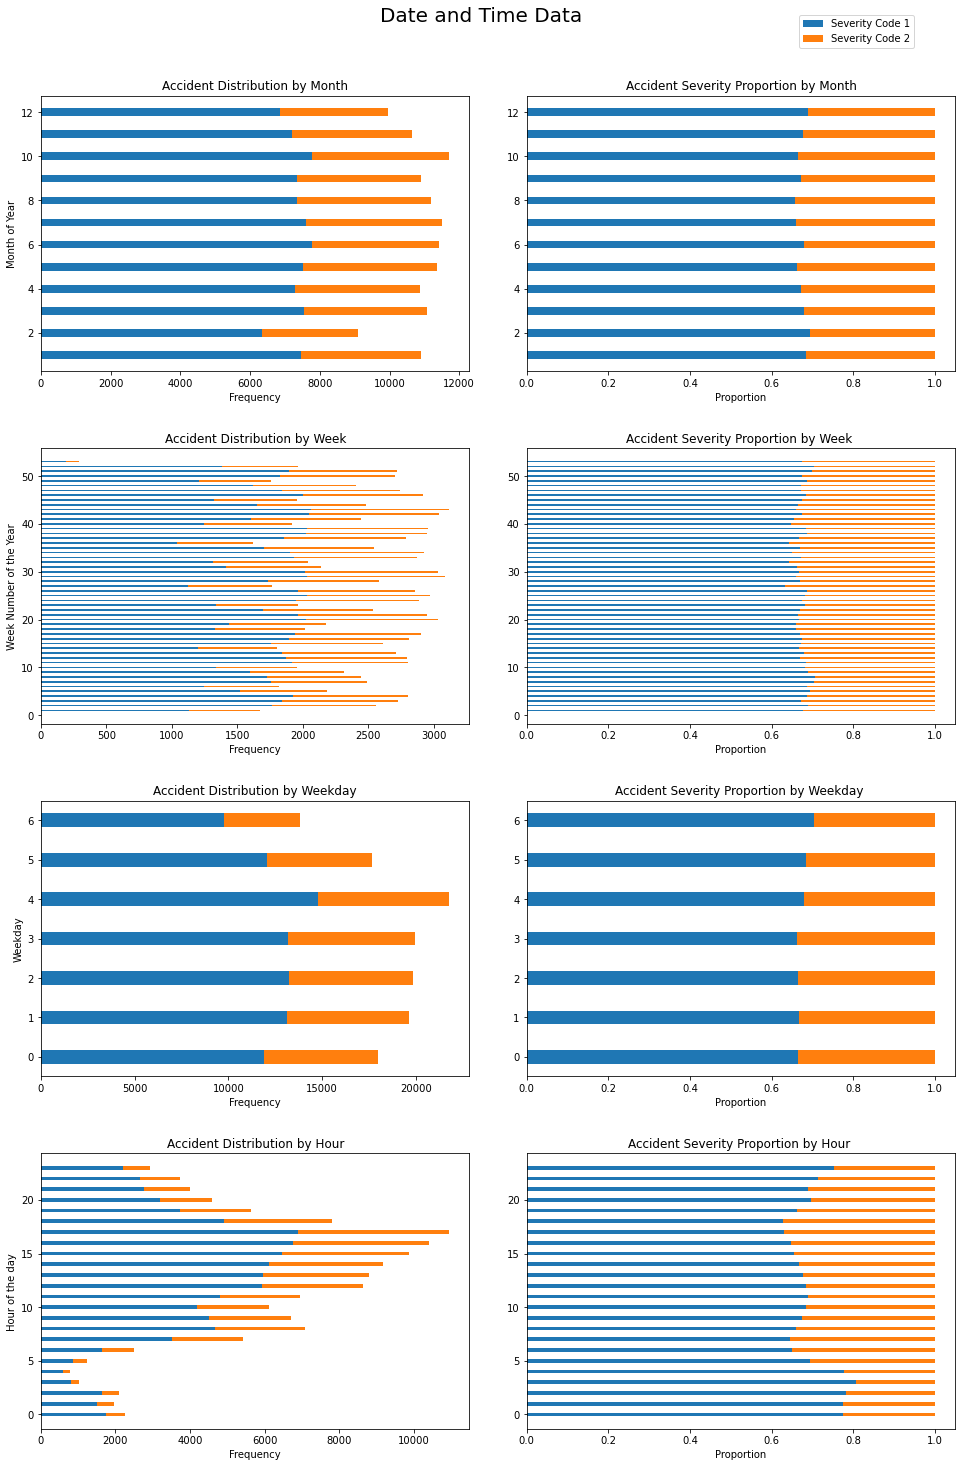

In [71]:
fig, axs = plt.subplots(4,2,figsize=(14,20))
width=0.35
fig.suptitle("Date and Time Data",fontsize=20,y=1.03)

# MONTH
axs[0,0].barh(month.index,month['1'],width,label='Severity Code 1')
axs[0,0].barh(month.index,month['2'],width,left=month['1'],label='Severity Code 2')
axs[0,0].set(xlabel='Frequency', ylabel='Month of Year')
axs[0,0].set_title('Accident Distribution by Month')

axs[0,1].barh(month.index,month['1']/month['TOT'],width,label='Severity Code 1')
axs[0,1].barh(month.index,month['2']/month['TOT'],width,left=month['1']/month['TOT'],label='Severity Code 2')
axs[0,1].set(xlabel='Proportion', ylabel='')
axs[0,1].set_title('Accident Severity Proportion by Month')

# WEEK NUMBER
axs[1,0].barh(week.index,week['1'],width,label='Severity Code 1')
axs[1,0].barh(week.index,week['2'],width,left=week['1'],label='Severity Code 2',)
axs[1,0].set(xlabel='Frequency', ylabel='Week Number of the Year')
axs[1,0].set_title('Accident Distribution by Week')

axs[1,1].barh(week.index,week['1']/week['TOT'],width,label='Severity Code 1')
axs[1,1].barh(week.index,week['2']/week['TOT'],width,left=week['1']/week['TOT'],label='Severity Code 2')
axs[1,1].set(xlabel='Proportion', ylabel='')
axs[1,1].set_title('Accident Severity Proportion by Week ')


# WEEKDAY

axs[2,0].barh(weekday.index,weekday['1'],width,label='Severity Code 1')
axs[2,0].barh(weekday.index,weekday['2'],width,left=weekday['1'],label='Severity Code 2')
axs[2,0].set(xlabel='Frequency', ylabel='Weekday')
axs[2,0].set_title('Accident Distribution by Weekday')

axs[2,1].barh(weekday.index,weekday['1']/weekday['TOT'],width,label='Severity Code 1')
axs[2,1].barh(weekday.index,weekday['2']/weekday['TOT'],width,left=weekday['1']/weekday['TOT'],label='Severity Code 2')
axs[2,1].set(xlabel='Proportion', ylabel='')
axs[2,1].set_title('Accident Severity Proportion by Weekday ')

# HOUR

axs[3,0].barh(hour.index,hour['1'],width,label='Severity Code 1')
axs[3,0].barh(hour.index,hour['2'],width,left=hour['1'],label='Severity Code 2')
axs[3,0].set(xlabel='Frequency', ylabel='Hour of the day')
axs[3,0].set_title('Accident Distribution by Hour')

axs[3,1].barh(hour.index,hour['1']/hour['TOT'],width,label='Severity Code 1')
axs[3,1].barh(hour.index,hour['2']/hour['TOT'],width,left=hour['1']/hour['TOT'],label='Severity Code 2')
axs[3,1].set(xlabel='Proportion', ylabel='')
axs[3,1].set_title('Accident Severity Proportion by Hour ')

handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.85, 1.012))

fig.tight_layout(pad=3)
plt.show()




In [233]:
a = pd.DataFrame(df) 
a['INCDTTM']=pd.to_datetime(a['INCDTTM'])

In [235]:
a['INCDTTM'].head(7)

0   2013-03-27 14:54:00
1   2006-12-20 18:55:00
2   2004-11-18 10:20:00
3   2013-03-29 09:26:00
4   2004-01-28 08:04:00
5   2019-04-20 17:42:00
6   2008-12-09 00:00:00
Name: INCDTTM, dtype: datetime64[ns]

In [290]:
df_pivot = pd.pivot_table(df[['COLLISIONTYPE','WEATHER','SEVERITYCODE']], index=['COLLISIONTYPE','WEATHER'], aggfunc='count',fill_value=0)

In [291]:
df_pivot2 = df_pivot.unstack(level=0)

In [292]:
df_pivot2

SEVERITYCODE                                     \
COLLISIONTYPE                  Angles  Cycles Head On Left Turn    Other   
WEATHER                                                                    
Blowing Sand/Dirt                 6.0     1.0     1.0       2.0      4.0   
Clear                         21144.0  3909.0  1082.0    8583.0  13264.0   
Fog/Smog/Smoke                  101.0     5.0     5.0      38.0    127.0   
Other                            64.0     7.0     5.0      27.0     73.0   
Overcast                       5536.0   790.0   319.0    2114.0   3874.0   
Partly Cloudy                     1.0     NaN     NaN       1.0      1.0   
Raining                        7133.0   582.0   525.0    2700.0   5318.0   
Severe Crosswind                  4.0     NaN     NaN       1.0      9.0   
Sleet/Hail/Freezing Rain         27.0     1.0     4.0       3.0     28.0   
Snowing                         108.0     2.0    36.0      21.0    190.0   
Unknown                         533.0   112.0    46.0     209.0    754.0   

                                                                                
COLLISIONTYPE            Parked Car Pedestrian Rear Ended Right Turn Sideswipe  
WEATHER                                                                         
Blowing Sand/Dirt              22.0        1.0        9.0        2.0       8.0  
Clear                       24940.0     3820.0    20583.0     1932.0   11872.0  
Fog/Smog/Smoke                116.0       21.0      103.0       10.0      43.0  
Other                         489.0       21.0       85.0        6.0      55.0  
Overcast                     5667.0      947.0     5116.0      453.0    2892.0  
Partly Cloudy                   1.0        NaN        NaN        NaN       1.0  
Raining                      4866.0     1589.0     7047.0      440.0    2938.0  
Severe Crosswind                4.0        NaN        5.0        1.0       1.0  
Sleet/Hail/Freezing Rain       26.0        6.0       14.0        NaN       4.0  
Snowing                       373.0       20.0      101.0       10.0      46.0  
Unknown                     11418.0      173.0     1007.0      100.0     737.0

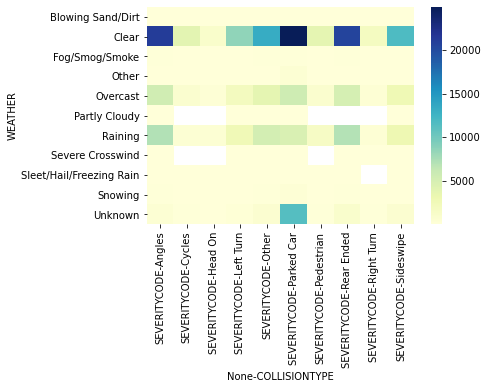

In [293]:
ax = sns.heatmap(df_pivot2, cmap="YlGnBu")

In [590]:
light_weather = df_ext.pivot_table(index='LOCATION',columns='WEATHER',values='SEVERITYCODE',aggfunc='count',fill_value=0)

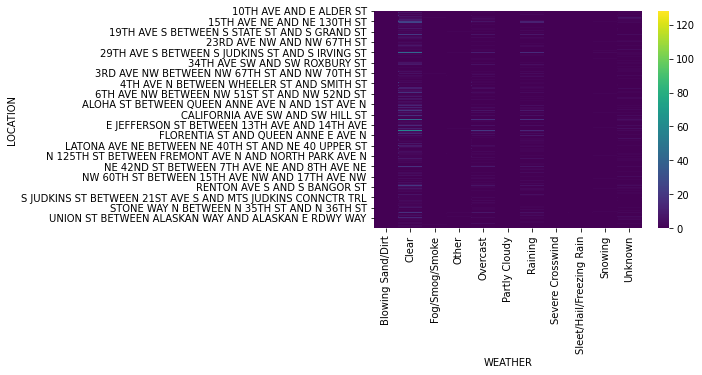

In [591]:
sns.heatmap(light_weather,cmap='viridis')

## MODELING

In [75]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [73]:
# Defining the feature for model
Feature = pd.get_dummies(df_ext)

### Dealing with imbalanced classes

In [116]:
# Separating classes

Maj_Feat= Feature[Feature['SEVERITYCODE']==1]
Min_Feat= Feature[Feature['SEVERITYCODE']==2]

print('Majority Class Length ',len(Maj_Feat))
print('Minority Class Length ',len(Min_Feat))

Majority Class Length  88057
Minority Class Length  42578


In [132]:
# The number of samples to model is defined based on the number of occurrences of the minority class.
# Specifically, 20% will be dedicated for a subsequent independent testing of the modeling, that is:

# Minority Class Length = 42578 --->  Model: 42578*0.8 = 34062  -->   Train = 34062*0.8 = 27250
#                                                               -->   Model Test = 34062*0.2 = 6812
#                               Final Test:  42578*0.2 = 8516

# Spliting the minority class to model and final test data set
Min_Model, Min_Test = train_test_split( Min_Feat, test_size=0.2, random_state=10)

# Downsampling the majority class data to the same samples that minority class and keep the drop samples to test dataset.
Maj_Model, Maj_Test = train_test_split( Maj_Feat, test_size=0.61318, random_state=10)

print('Majority Class Length for Modeling',len(Maj_Model), 'and for Final Test',len(Maj_Test))
print('Minority Class Length for Modeling',len(Min_Model), 'and for Final Test',len(Min_Test))

Majority Class Length for Modeling 34062 and for Final Test 53995
Minority Class Length for Modeling 34062 and for Final Test 8516


In [142]:
# Defining the news datasets for modeling and for the final test dataset
Feature_bal = pd.concat([Min_Model, Maj_Model])
FinalTestSet = pd.concat([Min_Test, Maj_Test])

FTestX=FinalTestSet.drop(['SEVERITYCODE'], axis ='columns').values
FTestY=FinalTestSet['SEVERITYCODE'].values

In [137]:
Feature_bal['SEVERITYCODE'].value_counts()

2    34062
1    34062
Name: SEVERITYCODE, dtype: int64

### Defining features and target to the model

In [138]:
X=Feature_bal.drop(['SEVERITYCODE'], axis ='columns').values
y=Feature_bal['SEVERITYCODE'].values

In [140]:
# Normalize Data
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
#X[0:5]

In [141]:
# Train and Test Split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (54499, 23) (54499,)
Test set: (13625, 23) (13625,)


### k-Nearest Neighbours 

In [143]:
# Starting model with k=4
k = 4

# Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

# Predicting
yhat = neigh.predict(X_test)    # Test set
#yhat[0:5]

yhat_FT = neigh.predict(FTestX) # Indep. Final Test set

#Accuracy Evaluation
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("Final Test set Accuracy: ", metrics.accuracy_score(FTestY, yhat_FT))

Train set Accuracy:  0.7135543771445347
Test set Accuracy:  0.5377614678899083
Final Test set Accuracy:  0.49066564284685893


In [144]:
# Iteracion de Ks
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
acc_final = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    yhatf=neigh.predict(FTestX)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    acc_final[n-1] = metrics.accuracy_score(FTestY, yhatf)

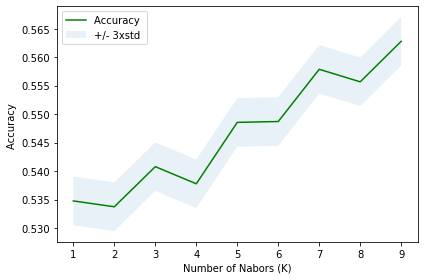

In [145]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.1)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [146]:
 acc_final

array([0.26438547, 0.61091648, 0.30892163, 0.49066564, 0.3437475 ,
       0.46270256, 0.34184384, 0.59144791, 0.43776295])

### Decision Tree

In [ ]:
# MODELING
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4) # Criterion Entropy shows info gain of each node.
Tree # it shows the default parameters
Tree.fit(X_trainset,y_trainset)

# PREDICTION
predTree = drugTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])

# EVALUATION
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

### Logistic Regression

In [ ]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
# Predicting
yhat = LR.predict(X_test)
yhat

yhat_prob = LR.predict_proba(X_test)
yhat_prob

from sklearn.metrics import log_loss